# Lesson - Statistics and Probability XVIII: Naive Bayes Algorithm

In this lesson, we'll build a spam filtr using Naive Bayes algorithm which is based on Bayes theorem.

### Spam Filter

Spam is most commonly associated with emails. For instance, unwanted and unsolicited advertising emails are usually classified as spam. Spamming, however, occurs in ways and environments that don't necessarily relate to emails:

- Articles or blog posts can be spammed with comments — the comments are ads or they are repetitive.
- An educational forum may be spammed with posts that are, in fact, ads.
- Mobile phone users may receive unwanted and unsolicited SMS messages, usually about advertising.

In this lesson, we're going to build a spam filter specifically directed at preventing mobile phone spam. The filter will be able to analyze new messages and tell whether they are spam or not — this way, we might be able to prevent spam from bothering mobile phone users.

To build the spam filter, we're going to use an algorithm called Naive Bayes — as the name suggests, the algorithm is based on Bayes' theorem.

### Naive Bayes - Overview

One way of creating a spam filter would be to create a list of words that occurr frequently in spam messages, and then write a bunch of if statements:

- If the word "money" is in the message, then classify the message as spam.
- If the words "secret" and "money" are both in the message, then classify the message as spam; etc.

However, as messages become numerous and more complex, coming up with the right if statements will slowly become very difficult.

Alternately we could use an algorithm like `Naive Bayes` which makes the computer learn from the classification a humans does, and then the computer uses that knowledge to classify new messages.

The computer uses the specifications of the Naive Bayes algorithm to learn how we classify messages (what counts as spam and non-spam for us), and then it uses that human knowledge to estimate probabilities for new messages. Following the specifications of the algorithm, the computer tries to answer two conditional probability questions:

$$\begin{equation}
P(Spam | New\ message) =\ ? \\
P(Spam^C |New\ message) =\ ?
\end{equation}$$

In other words:
- What's the probability that this new message is spam, given its content (its words, punctuation, letter case, etc.)?
- What's the probability that this new message is non-spam, given its content?
Once it has an answer to these two questions, the computer classifies the message as spam or non-spam based on the probability values. If the probability for spam is greater, then the message is classified as spam. Otherwise, it goes into the non-spam category.

### Using Bayes Theorem

The computer may classify new messages using the Naive Bayes algorithm as follows:

- The computer learns how humans classify messages.
- Then it uses that human knowledge to estimate probabilities for new messages — probabilities for spam and non-spam.
- Finally, the computer classifies a new message based on the probability values it calculated in step 2 — if the probability for spam is greater, then it classifies the message as spam. Otherwise, it classifies it as non-spam (if the two probability values are equal, then we may want a human to classify the message).
- When a new message comes in, the algorithm requires the computer to calculate the following probabilities:

$$\begin{equation}
P(Spam | New\ message) =\ ? \\
P(Spam^C |New\ message) =\ ?
\end{equation}$$

The left side expression becomes:
$$\begin{equation}
P(Spam | New\ message) = \frac{P(Spam) \cdot P(New\ Message | Spam)}{P(New\ message)}
\end{equation}$$

The right side epxression becomes:

$$\begin{equation}
P(Spam^C | New\ message) = \frac{P(Spam^C) \cdot P(New\ Message | Spam^C)}{P(New\ message)}
\end{equation}$$

For the sake of example, let's assume the following probabilities are already known:

$$\begin{aligned}
&P(Spam) = 0.5 \\
&P(Spam^C) = 0.5 \\
&P(New\ message) = 0.4167 \\
&P(New\ Message | Spam) = 0.5 \\
&P(New\ Message | Spam^C) = 0.3334
\end{aligned}$$

$$\begin{equation}
P(Spam | New\ message) = \frac{0.5 \cdot 0.5}{0.4167} = 0.6 \\
P(Spam^C | New\ message) = \frac{0.5 \cdot 0.3334}{0.4167} = 0.4
\end{equation}$$


 Since $P(Spam | New\ message) > P(Spam^C | New\ message)$ the computer will classify the new message as spam.

**Exercise**

A new mobile message has been received: "URGENT!! You have one day left to claim your usd 873 prize." The following probabilities are known:

$$\begin{aligned}
&P(Spam) = 0.5 \\
&P(Spam^C) = 0.5 \\
&P(New\ message) = 0.5417 \\
&P(New\ Message | Spam) = 0.75 \\
&P(New\ Message | Spam^C) = 0.3334
\end{aligned}$$

- Calculate P(Spam|New Message). Assign your answer to `p_spam_given_new_message`.
- Calculate P(SpamC|New Message). Assign your answer to `p_non_spam_given_new_message`.
- Classify the message by comparing the probability values. If the message is spam, then assign the string 'spam' to the variable `classification`. Otherwise, assign the string 'non-spam'.

In [1]:
p_spam = 0.5
p_non_spam = 0.5
p_new_message = 0.5417
p_new_message_given_spam = 0.75
p_new_message_given_non_spam = 0.3334

In [2]:
p_spam_given_new_message = p_spam * p_new_message_given_spam/ p_new_message
p_non_spam_given_new_message = p_non_spam * p_new_message_given_non_spam / p_new_message

if p_spam_given_new_message > p_non_spam_given_new_message:
    classification = 'spam'
else:
    classification = 'non-spam'
    
print(classification)    

spam


### Ignoring the Division - Optimizing the Equation
 Both the above equations have the same denominator: P(New message). This means our two equations reduce to:
 $$\begin{equation}
P(Spam | New\ message) = P(Spam) \cdot P(New\ Message | Spam) \\
P(Spam^C | New\ message) = P(Spam^C) \cdot P(New\ Message | Spam^C)
\end{equation}$$

Ignoring the division doesn't affect the algorithm's ability to classify new messages, though the values in the equations do not denote respective probabilities any longer. The main goal of the algorithm is to classify new messages, not to calculate probabilities — calculating probabilities is just a means to an end. Ignoring the division by P(New message) means less calculations, which can make a lot of difference when we use the algorithm to classify 500,000 new messages. The classification itself remains completely unaffected because we ignore division for both equations (not just for one) and the changes are still directly proportion to one another. So we can now write:

$$\begin{equation}
P(Spam | New\ message) \propto P(Spam) \cdot P(New\ Message | Spam) \\
P(Spam^C | New\ message) \propto P(Spam^C) \cdot P(New\ Message | Spam^C)
\end{equation}$$

**Exercise**
A new mobile message has been received: "URGENT!! You have one day left to claim your  usd 873 prize." The following probabilities are known:

$$\begin{aligned}
&P(Spam) = 0.5 \\
&P(Spam^C) = 0.5 \\
&P(New\ Message | Spam) = 0.75 \\
&P(New\ Message | Spam^C) = 0.3334
\end{aligned}$$

Classify the new message as spam or non-spam without calculating probabilities:

- Calculate P(Spam|New Message). Assign answer to `p_spam_given_new_message`.
- Calculate P(SpamC|New Message). Assign your answer to `p_non_spam_given_new_message`.
- Classify the message by comparing the probability values — if the message is spam, then assign the string 'spam' to the variable `classification`. Otherwise, assign the string 'non-spam'.

In [3]:
p_spam = 0.5
p_non_spam = 0.5
p_new_message_given_spam = 0.75
p_new_message_given_non_spam = 0.3334

In [4]:
p_spam_given_new_message = p_spam * p_new_message_given_spam # It is not a probaility as not divided by total probability
p_non_spam_given_new_message = p_non_spam * p_new_message_given_non_spam # It is not a probaility as not divided by total probability

if p_spam_given_new_message > p_non_spam_given_new_message:
    classification = 'spam'
else:
    classification = 'non-spam'
    
print(classification)    

spam


### Using Human Classified Messages - Single Word Messages

We'll now look at how the algorithm can use messages that are already classified by humans to calculate the values it needs for:
P(Spam) and P(SpamC)
P(New message|Spam) and P(New message|SpamC).

We'll now look at how the algorithm can use messages that are already classified by humans to calculate the values it needs for:
Let's say we have three messages that are already classified:
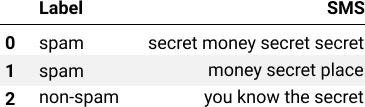

Now let's say the one-word message "secret" comes in and we want to use the Naive Bayes algorithm to classify it — to tell whether it's spam or non-spam.

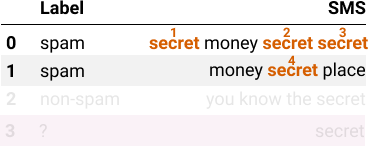

we first need to answer these two probability questions (note that we changed New Message to "secret" inside the notation below) and then compare the values:

$$\begin{equation}
P(Spam | \text{"secret"}) \propto P(Spam) \cdot P(\text{"secret"} | Spam) \\
P(Spam^C | \text{"secret"}) \propto P(Spam^C) \cdot P(\text{"secret"} | Spam^C)
\end{equation}$$

Let's begin with the first equation, for which we need to find the values of P(Spam) and P("secret"|Spam). To find P(Spam), we use the messages that are already classified and divide the number of spam messages by the total number of messages:

$$\begin{equation}
P(Spam) = \frac{\text{number of spam messages}}{\text{total number of messages}} = \frac{2}{3}
\end{equation}$$

To calculate P("secret"|Spam), we only look at the spam messages and divide the number of times the word "secret" occurred in all the spam messages by the total number of words.

$$\begin{equation}
P(\text{"secret"}| Spam) = \frac{\text{number of times the word "secret" occurs}}{\text{total number of words in all spam messages}}
\end{equation}$$

Notice that "secret" occurs four times in the spam messages:
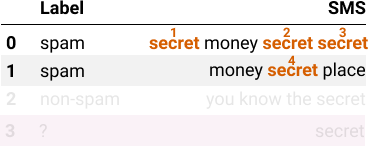

We have two spam messages and there's a total of seven words in all of them, so P("secret"|Spam) is:

$$\begin{equation}
P(\text{"secret"}| Spam) = \frac{\text{number of times the word "secret" occurs}}{\text{total number of words in all spam messages}} = \frac{4}{7}
\end{equation}$$

Now that we know the values for P(Spam) and P("secret"|Spam), we have all we need to calculate P(Spam|"secret"):

$$\begin{aligned}
P(Spam | \text{"secret"}) &\propto P(Spam) \cdot P(\text{"secret"} | Spam) \\
&= \frac{2}{3} \cdot \frac{4}{7} = \frac{8}{21}
\end{aligned}$$

**Exercise**

Using the table below (there are the same messages as above), classify the message "secret" as spam or non-spam.

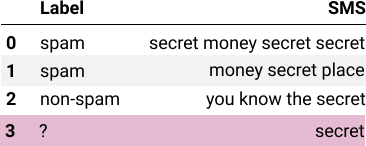

- Calculate P(SpamC) and assign the answer to `p_non_spam`.
- Calculate P("secret"|SpamC) and assign the answer to `p_secret_given_non_spam`.
- Calculate P(SpamC|"secret") and assign the answer to `p_non_spam_given_secret`.
- Compare P(SpamC|"secret") with P(Spam|"secret") and classify the message "secret" — if the message is spam, then assign the string 'spam' to the variable classification, otherwise assign the string 'non-spam'.

In [5]:
p_spam_given_secret = 8/21 # as calculated above

p_non_spam = 1/3
p_secret_given_non_spam = 1/4 # number of 'secret' divided by number of words in non_spam

p_non_spam_given_secret = p_non_spam * p_secret_given_non_spam

if p_spam_given_secret > p_non_spam_given_secret:
    classification = 'spam'
else:
    classification = 'non-spam'
    
print(classification)    

spam


### ### Using Human Classified Messages - Muliple Words Messages

Above, the message "secret" has only one word, but what about the situation where we have to classify messages that have more words?
Let's say we want to classify the message "secret place secret secret" based on four messages that are already classified (the four messages below are different than what what we saw above):

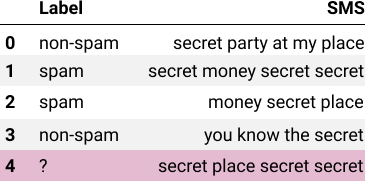

To calculate the probabilities we need, we'll treat each word in our new message separately. This means that the word "secret" at the beginning is different and separate from the word "secret" at the end. There are four words in the message "secret place secret secret", and we're going to abbreviate them "w1", "w2", "w3" and "w4" (the "w" comes from "word").

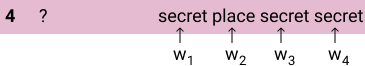

Since we treat each word separately, these are the two equations we can use to calculate the probabilities:

$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \\
P(Spam^C | w_1,w_2,w_3,w_4) \propto P(Spam^C) \cdot P(w_1|Spam^C) \cdot P(w_2|Spam^C) \cdot P(w_3|Spam^C) \cdot P(w_4|Spam^C) \\
\end{equation}$$

Let's begin with calculating P(Spam|w1, w2, w3, w4). To calculate the probabilities we need, we'll look at the four messages that are already classified. We have four messages and two of them are spam, so:

$$\begin{equation}
P(Spam) = \frac{2}{4} = \frac{1}{2}
\end{equation}$$

The first word, w1, is "secret", and we see that "secret" occurs four times in all spam messages. There's a total of seven words in all the spam messages, so:
$$\begin{equation}
P(w_1|Spam) = \frac{4}{7} 
\end{equation}$$

$$\begin{equation}
P(w_2|Spam) = \frac{1}{7} \\
P(w_3|Spam) = \frac{4}{7} \\
P(w_4|Spam) = \frac{4}{7}
\end{equation}$$

We now have all the probabilities we need to calculate P(Spam|w1, w2, w3, w4):

$$\begin{aligned}
P(Spam | w_1,w_2,w_3,w_4) &\propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \\
&= \frac{1}{2} \cdot \frac{4}{7} \cdot \frac{1}{7} \cdot \frac{4}{7} \cdot \frac{4}{7} = \frac{64}{4802} = 0.01333
\end{aligned}$$

**Exercise**

Using the table below (the same as above), classify the message "secret place secret secret" as spam or non-spam.

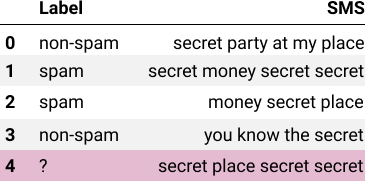

- Calculate P(SpamC|w1, w2, w3, w4). Assign the answer to `p_non_spam_given_w1_w2_w3_w4`. 
- Compare P(SpamC|w1, w2, w3, w4) with P(Spam|w1, w2, w3, w4) and classify the message "secret place secret secret" — if the message is spam, then assign the string 'spam' to the variable `classification`. Otherwise, assign the string 'non-spam'.

In [6]:
p_spam_given_w1_w2_w3_w4 = 64/4802 # Calculated above
p_non_spam = 2/4

p_w1_given_non_spam = 2/9 # first word is secret which occurs twice in nine words of non_spam messages
p_w2_given_non_spam = 1/9 # first word is secret which occurs once in nine words of non_spam messages
p_w3_given_non_spam = 2/9 # third word is secret which occurs twice in nine words of non_spam messages
p_w4_given_non_spam = 2/9 # fourth word is secret which occurs twice in nine words of non_spam messages

p_non_spam_given_w1_w2_w3_w4 = p_non_spam * p_w1_given_non_spam * p_w2_given_non_spam * p_w3_given_non_spam * p_w4_given_non_spam
                                


if p_spam_given_w1_w2_w3_w4 > p_non_spam_given_w1_w2_w3_w4:
    classification = 'spam'
else:
    classification = 'non-spam'
    
print(classification)

spam


### Conditional Independence

To explain the mathematics behind the equations used above i.e.:

$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \\
P(Spam^C | w_1,w_2,w_3,w_4) \propto P(Spam^C) \cdot P(w_1|Spam^C) \cdot P(w_2|Spam^C) \cdot P(w_3|Spam^C) \cdot P(w_4|Spam^C) \\
\end{equation}$$

 let's start by looking at P(Spam|w1, w2, w3, w4). Using the conditional probability formula, we can expand P(Spam|w1, w2, w3, w4) like this:
 
 $$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) = \frac{P(Spam \cap (w_1, w_2, w_3, w_4))}{P(w_1, w_2, w_3, w_4)}
\end{equation}$$

We can ignore the division, which means we can drop P(w1, w2, w3, w4) to avoid redundant calculations (when we ignore the division, we also replace the equals sign with ∝, which means directly proportional):

$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam \cap (w_1, w_2, w_3, w_4))
\end{equation}$$

Note that (w1, w2, w3, w4) can be modeled as an intersection of four events:

$$\begin{equation}
w_1,w_2,w_3,w_4 = w_1 \cap w_2 \cap w_3 \cap w_4
\end{equation}$$

For instance, we could think of a message like "thanks for your help" as the intersection of four words inside a single message: "thanks", "for, "your", and "help". In probability jargon, finding the value of P(w1∩w2∩w3∩w4) means finding the probability that the four words w1, w2, w3, w4 occur together in a single message — this is similar to P(A∩B∩C∩D), which is the probability that events A, B, C, and D occur together.

With this in mind, our equation above transforms to:
$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam \cap \underbrace{(w_1 \cap w_2 \cap w_3 \cap w_4)}_{\displaystyle (w_1,w_2,w_3,w_4)})
\end{equation}$$

 From set theory we know that $A \cap (B \cap C) = A \cap B \cap C = C \cap B \cap A$ which means we can transform $P(Spam \cap (w_1 \cap w_2 \cap w_3 \cap w_4)) as:
 
 $$\begin{aligned}
P(Spam \cap (w_1 \cap w_2 \cap w_3 \cap w_4)) &= P(Spam \cap w_1 \cap w_2 \cap w_3 \cap w_4) \\
&= P(w_1 \cap w_2 \cap w_3 \cap w_4 \cap Spam)
\end{aligned}$$

We can use the multiplication rule to expand further the above equation:

$$\begin{equation}
P(w_1 \cap w_2 \cap w_3 \cap w_4 \cap Spam) = P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 \cap w_3 \cap w_4 \cap Spam)
\end{equation}$$
We can use the multiplication rule again to expand P(w2 ∩ w3 ∩ w4 ∩ Spam):

$$\begin{equation}
P(w_1 \cap w_2 \cap w_3 \cap w_4 \cap Spam) = P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot \underbrace{P(w_2 | w_3 \cap w_4 \cap Spam) \cdot P(w_3 \cap w_4 \cap Spam)}_{\displaystyle P(w_2 \cap w_3 \cap w_4 \cap Spam)}
\end{equation}$$

We can use the multiplication rule successively, until there's nothing more left to expand:

$$\begin{aligned}
P(w_1 \cap w_2 \cap w_3 \cap w_4 \cap Spam) &= P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 \cap w_3 \cap w_4 \cap Spam) \\
&= P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 | w_3 \cap w_4 \cap Spam) \cdot P(w_3 \cap w_4 \cap Spam) \\
&= P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 | w_3 \cap w_4 \cap Spam) \cdot P(w_3 | w_4 \cap Spam) \cdot P(w_4 \cap Spam) \\
&= P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) \cdot P(w_2 | w_3 \cap w_4 \cap Spam) \cdot P(w_3 | w_4 \cap Spam) \cdot P(w_4|Spam) \cdot P(Spam) \\
\end{aligned}$$

In theory, the last equation we see above is what we'd have to use if we wanted to calculate P(Spam|w1, w2, w3, w4). However, the equation is pretty long for just four words. Also, imagine how would the equation look for a 50-word message — just think of how many calculations we'd have to perform!!

To make the calculations tractable for messages of all kinds of lengths, we can assume conditional independence between w1, w2, w3, and w4:

$$\begin{aligned}
&P(w_1 | w_2 \cap w_3 \cap w_4 \cap Spam) = P(w_1|Spam) \\
&P(w_2 | w_3 \cap w_4 \cap Spam) = P(w_2|Spam) \\ 
&P(w_3 | w_4 \cap Spam) = P(w_3|Spam) \\
&P(w_4|Spam) = P(w_4|Spam) \\
\end{aligned}$$

Under the assumption of independence, our lengthy equation above reduces to:

$$\begin{equation}
P(w_1 \cap w_2 \cap w_3 \cap w_4 \cap Spam) = P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \cdot P(Spam)
\end{equation}$$

The assumption of conditional independence is unrealistic in practice because words are often in a relationship of dependence. For instance, if we see the word "WINNER" in a message, the probability of seeing the word "money" is very likely to increase, so "WINNER" and "money" are most likely dependent. The assumption of conditional independence between words is thus **naive** since it rarely holds in practice, and this is why the algorithm is called **Naive Bayes** (also called simple Bayes or independence Bayes).

Despite this simplifying assumption, the algorithm works quite well in many real-word situations. 

So we assumed conditional independence when we introduced these two equations:

$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \\
P(Spam^C | w_1,w_2,w_3,w_4) \propto P(Spam^C) \cdot P(w_1|Spam^C) \cdot P(w_2|Spam^C) \cdot P(w_3|Spam^C) \cdot P(w_4|Spam^C) \\
\end{equation}$$

### Naive Bayes - General Equation

Above, we made the conditional independence assumption, which is central to the Naive Bayes algorithm. As a result of the assumption, we saw we can use these simplified equations:

$$\begin{equation}
P(Spam | w_1,w_2,w_3,w_4) \propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot P(w_3|Spam) \cdot P(w_4|Spam) \\
P(Spam^C | w_1,w_2,w_3,w_4) \propto P(Spam^C) \cdot P(w_1|Spam^C) \cdot P(w_2|Spam^C) \cdot P(w_3|Spam^C) \cdot P(w_4|Spam^C) \\
\end{equation}$$

The equations above work for messages that have four words, but we need a more general form to use with messages of various word lengths. If a new message has n words, where n can be any positive integer (1, 2, 3, ..., 50, 51, 53, ...). If we wanted to find P(Spam|w1, w2, ..., wn), then this is an equation we could use:

$$\begin{equation}
P(Spam | w_1,w_2, \ldots, w_n) \propto P(Spam) \cdot P(w_1|Spam) \cdot P(w_2|Spam) \cdot \ldots \cdot P(w_n|Spam)
\end{equation}$$

Notice that there's a certain pattern in the equation above — after P(Spam), the only thing that changes is the word number.
$$\begin{equation}
P(Spam | w_1,w_2, \ldots, w_n) \propto P(Spam) \cdot P(\overbrace{w_1}^{1}|Spam) \cdot P(\overbrace{w_2}^{2}|Spam) \cdot \ldots \cdot P(\overbrace{w_n}^{n}|Spam)
\end{equation}$$

Whenever we have a product that follows a pattern like that, it's common to use the ∏ symbol (this is the uppercase Greek letter "pi"). So the equation above simplifies to:

$$\begin{equation}
P(Spam | w_1,w_2, \ldots, w_n) \propto P(Spam) \cdot \prod_{i=1}^{n}P(w_i|Spam)
\end{equation}$$

Above is same as:

$$\begin{equation}
P(Spam | w_1,w_2, \ldots, w_n) \propto P(Spam) \cdot \overbrace{P(w_1|Spam) \cdot P(w_2|Spam) \cdot \ldots \cdot P(w_n|Spam)}^{\displaystyle \prod_{i=1}^{n}P(w_i|Spam)}
\end{equation}$$

Applying the same reasoning to P(SpamC|w1, w2, ..., wn), we have:

$$\begin{equation}
P(Spam^C | w_1,w_2, \ldots, w_n) \propto P(Spam^C) \cdot \prod_{i=1}^{n}P(w_i|Spam^C)
\end{equation}$$

### Edge Cases

Previously, we looked at a few messages that were already classified:
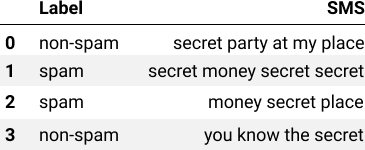

Above, we have four messages and nine unique words: "secret", "party", "at", "my", "place", "money", "you", "know", "the". We call the set of unique words a **vocabulary**.

Now, what if we receive a new message that contains words which are not part of the vocabulary? How do we calculate probabilities for this kind of words?

For instance, say we received the message "secret code to unlock the money".
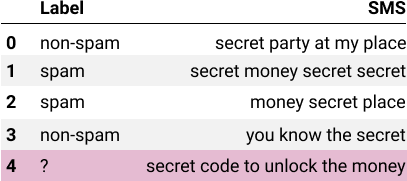

Notice that for this new message:

- The words "code", "to", and "unlock" are not part of the vocabulary.
- The word "secret" is part of both spam and non-spam messages.
- The word "money" is only part of the spam messages and is missing from the non-spam messages.
- The word "the" is missing from the spam messages and is only part of the non-spam messages.

Whenever we have to deal with words that are not part of the vocabulary, one solution is to ignore them when we're calculating probabilities. If we wanted to calculate P(Spam|"secret code to unlock the money"), we could skip calculating P("code"|Spam), P("to"|Spam), and P("unlock"|Spam) because "code", "to", and "unlock" are not part of the vocabulary:

$$\begin{equation}
P(Spam|\text{"secret code to unlock the money"}) \propto P(Spam) \cdot {P(\text{"secret"}|Spam) \cdot P(\text{"the"}|Spam) \cdot P(\text{"money"}|Spam)}
\end{equation}$$

We can also apply the same reasoning for calculating P(SpamC|"secret code to unlock the money"):

$$\begin{equation}
P(Spam^C|\text{"secret code to unlock the money"}) \propto P(Spam^C) \cdot P(\text{"secret"}|Spam^C) \cdot P(\text{"the"}|Spam^C) \cdot P(\text{"money"}|Spam^C)
\end{equation}$$

**Exercise**

Use the table below (the same as above) to calculate P(Spam|"secret code to unlock the money") and P(SpamC|"secret code to unlock the money")

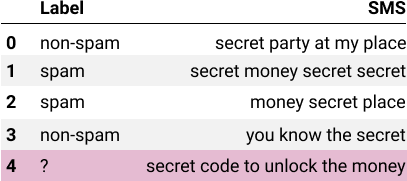

- Calculate P(SpamC|"secret code to unlock the money"). Assign answer to `p_spam_given_message`.
- Calculate P(SpamC|"secret code to unlock the money"). Assign answer to `p_non_spam_given_message`.
- Print `p_spam_given_message` and `p_non_spam_given_message`

In [7]:
p_spam = 2/4
p_secret_given_spam = 4/7
p_the_given_spam = 0/7
p_money_given_spam = 2/7
p_spam_given_message = (p_spam * p_secret_given_spam *
                        p_the_given_spam * p_money_given_spam)

p_non_spam = 1 - p_spam
p_seret_given_non_spam = 2/9
p_the_given_non_spam = 1/9
p_money_given_non_spam = 0/9
p_non_spam_given_message = (p_non_spam * p_seret_given_non_spam * 
                            p_the_given_non_spam * p_money_given_non_spam)

print(p_spam_given_message, p_non_spam_given_message)


0.0 0.0


### Additive Smoothing

Above, we saw that both P(Spam|"secret code to unlock the money") and P(SpamC|"secret code to unlock the money") were equal to 0. This will always happen when we have words that occur in only one category — "money" occurs only in spam messages, while "the" only occurs in non-spam messages.
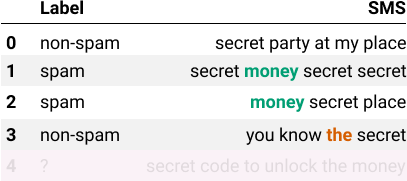

When we calculate P(Spam|"secret code to unlock the money"), we can see that P("the"|Spam) is equal to 0 because "the" is not part of the spam messages. Unfortunately, that single value of 0 has the drawback of turning the result of the entire equation to 0:

$$\begin{aligned}
P(Spam|\text{"secret code to unlock the money"}) &\propto P(Spam) \cdot P(\text{"secret"}|Spam) \cdot P(\text{"the"}|Spam) \cdot P(\text{"money"}|Spam) \\
&= \frac{2}{4} \cdot \frac{4}{7} \cdot \frac{0}{7} \cdot \frac{2}{7} = 0
\end{aligned}$$

To fix this problem, we need to find a way to avoid these cases where we get probabilities of 0. Let's start by laying out the equation we're using to calculate P("the"|Spam):

$$\begin{equation}
P(\text{"the"}|Spam) = \frac{\text{total number of times "the" occurs in spam messages}}{\text{total number of words in spam messages}} = \frac{0}{7}
\end{equation}$$

We're going to add some notation and rewrite the equation above as:

$$\begin{equation}
P(\text{"the"}|Spam) = \frac{N_{\text{"the"}|Spam}}{N_{Spam}} = \frac{0}{7}
\end{equation}$$

To fix the problem, we're going to use a technique called **additive smoothing**, where we add a smoothing parameter α. In the equation below, we'll use α=1 (below, NVocabulary represents the number of unique words in all the messages — both spam and non-spam).

$$\begin{equation}
P(\text{"the"}|Spam) = \frac{N_{\text{"the"}|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}} = \frac{0 + 1}{7 + 1 \cdot 9} = \frac{1}{16}
\end{equation}$$

The additive smoothing technique solves the issue and gets us a non-zero result, but it introduces another problem. We're now calculating probabilities differently depending on the word — take P("the"|Spam) and P("secret"|Spam) for instance:

$$\begin{equation}
P(\text{"the"}|Spam) = \frac{N_{\text{"the"}|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}} \\
P(\text{"secret"}|Spam) = \frac{N_{\text{"secret"}|Spam}}{N_{Spam}}
\end{equation}$$

Words like "the" are thus given special treatment and their probability are increased artificially to avoid non-zero cases, while words like "secret" are treated normally. To keep the probability values proportional across all words, we're going to use the additive smoothing for every word:

$$\begin{equation}
P(\text{"the"}|Spam) = \frac{N_{\text{"the"}|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}} \\
P(\text{"secret"}|Spam) = \frac{N_{\text{"secret"}|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}}
\end{equation}$$

In more general terms, this is the equation that we'll need to use for every word:

$$\begin{equation}
P(word|Spam) = \frac{N_{\text{word}|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}}
\end{equation}$$

When α=1, the additive smoothing technique is most commonly known as **Laplace smoothing** (or add-one smoothing). However, it is also possible to use α<1, in which case the technique is called **Lidstone smoothing**.

**Exercise**

Use the table below (the same as above) to calculate P(Spam|"secret code to unlock the money") and P(SpamC|"secret code to unlock the money").
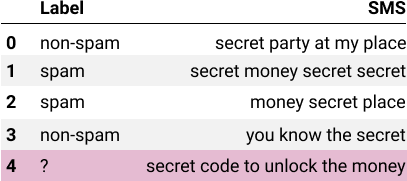

Using the additive smoothing technique, calculate P(Spam|"secret code to unlock the money"). Assign answer to `p_spam_given_message`.
- Using the additive smoothing technique, calculate P(SpamC|"secret code to unlock the money"). Assign answer to `p_non_spam_given_message`.
- Compare p_spam_given_message and p_non_spam_given_message to classify the message as spam or non-spam. If you think it's spam, then assign the string 'spam' to `classification`. Otherwise, assign 'non-spam'.

In [8]:
p_spam = 2/4
p_secret_given_spam = (4 + 1) / (7 + 9)
p_the_given_spam = (0 + 1) / (7 + 9)
p_money_given_spam = (2 + 1) / (7 + 9)
p_spam_given_message = (p_spam * p_secret_given_spam *
                        p_the_given_spam * p_money_given_spam)


p_non_spam = 1 - p_spam
p_secret_given_non_spam = (2 + 1) / (9 + 9)
p_the_given_non_spam = (1 + 1) / (9 + 9)
p_money_given_non_spam = (0 + 1) / (9 + 9)
p_non_spam_given_message = (p_non_spam * p_secret_given_non_spam *
                        p_the_given_non_spam * p_money_given_non_spam)



if p_spam_given_message > p_non_spam_given_message:
    classification = 'spam'
else:
    classification = 'non-spam'
    
print(classification)


spam


### Multinomial Naive Bayes

The Naive Bayes algorithm can be used for more than just building spam filters. For instance, we could use it to perform sentiment analysis for Twitter messages — the input is a Twitter message, and the output is the sentiment type (positive or negative). This follows the same pattern we saw with our spam filter, where the input is a new SMS message and the output is the message type (spam or non-spam).

Depending on the math and the assumptions used, the Naive Bayes algorithm has a few variations. The three most popular Naive Bayes algorithms are:

- Multinomial Naive Bayes
- Gaussian Naive Bayes
- Bernoulli Naive Bayes

In this lesson, we learned the **multinomial Naive Bayes** version of the algorithm.

### Summary
Two equations we can use for our spam filtering problem moving forward:

$$\begin{equation}
P(Spam | w_1,w_2, ..., w_n) \propto P(Spam) \cdot \prod_{i=1}^{n}P(w_i|Spam)
\end{equation}$$

$$\begin{equation}
P(Spam^C | w_1,w_2, ..., w_n) \propto P(Spam^C) \cdot \prod_{i=1}^{n}P(w_i|Spam^C)
\end{equation}$$

To calculate P(wi|Spam) and P(wi|SpamC), we need to use the additive smoothing technique:

$$\begin{equation}
P(w_i|Spam) = \frac{N_{w_i|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}}
\end{equation}$$

$$\begin{equation}
P(w_i|Spam^C) = \frac{N_{w_i|Spam^C} + \alpha}{N_{Spam^C} + \alpha \cdot N_{Vocabulary}}
\end{equation}$$

the terms in the equations above mean:

$$\begin{aligned}
&N_{w_i|Spam} = \text{the number of times the word } w_i \text{ occurs in spam messages} \\
&N_{w_i|Spam^C} = \text{the number of times the word } w_i \text{ occurs in non-spam messages} \\
\\
&N_{Spam} = \text{total number of words in spam messages} \\
&N_{Spam^C} = \text{total number of words in non-spam messages} \\
\\
&N_{Vocabulary} = \text{total number of words in the vocabulary} \\
&\alpha = 1 \ \ \ \ (\alpha \text{ is a smoothing parameter})
\end{aligned}$$

- NSpam is equal to the number of words in all the spam messages — it's not equal to the number of spam messages, and it's not equal to the total number of unique words in spam messages.
- NSpamC is equal to the number of words in all the non-spam messages — it's not equal to the number of non-spam messages, and it's not equal to the total number of unique words in non-spam messages.
